<a href="https://colab.research.google.com/github/amimulhasan/Deep-Learning/blob/main/Artificial_Neural_Network_using_Weight_Initialization_Tricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [25]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [26]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [27]:
# create dummy variables
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [28]:
x=pd.concat([x,geography,gender],axis=1)

In [29]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,True,False,True


In [30]:
x=x.drop(['Geography','Gender'],axis=1)

In [31]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc=StandardScaler()

In [36]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [37]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU,ReLU
from keras.layers import Dropout

In [39]:
cls = Sequential()

In [43]:
cls.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
cls.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))
cls.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
cls.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])
model_history=cls.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7883 - loss: 0.5252 - val_accuracy: 0.7955 - val_loss: 0.4977
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7904 - loss: 0.5054 - val_accuracy: 0.7955 - val_loss: 0.4845
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8053 - loss: 0.4748 - val_accuracy: 0.7955 - val_loss: 0.4732
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7948 - loss: 0.4737 - val_accuracy: 0.7955 - val_loss: 0.4636
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8089 - loss: 0.4451 - val_accuracy: 0.7955 - val_loss: 0.4543
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7941 - loss: 0.4515 - val_accuracy: 0.7955 - val_loss: 0.4459
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7903 - loss: 0.4445 - val_accuracy: 0.7955 - val_loss: 0.4385
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8054 - loss: 0.4244 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


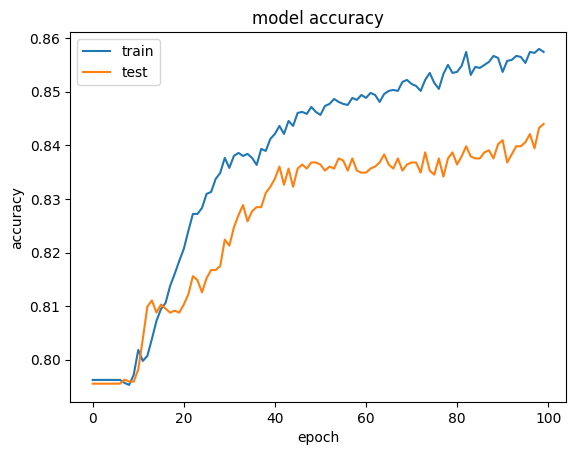

In [45]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


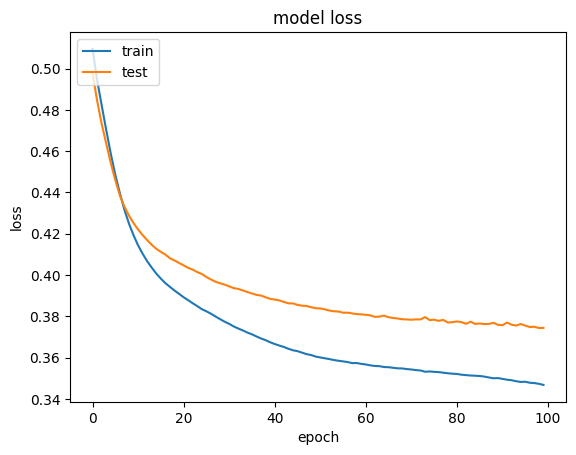

In [46]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
y_pred = cls.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [49]:
cm

array([[1532,   63],
       [ 237,  168]])

In [50]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [51]:
score

0.85